In [1]:
##Data Manipulation
import pandas as pd
import numpy as np
import re
import string
from textblob import TextBlob
import string
import matplotlib.pyplot as plt

## methods and stopwords text processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

## Machine learning Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve, auc


import warnings
warnings.filterwarnings("ignore")

In [2]:
## Loading Tweet Dataset
df1 = pd.read_csv("Bitcoin_tweets.csv")
df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


# Preprocess tweets

In [3]:
##Selecting 20k row and Only text column
tweets = df1.iloc[0:20000,-4:-3]
tweets.head()

,text
0,Blue Ridge Bank shares halted by NYSE after #b...
1,"😎 Today, that's this #Thursday, we will do a ""..."
2,"Guys evening, I have read this article about B..."
3,$BTC A big chance in a billion! Price: \487264...
4,This network is secured by 9 508 nodes as of t...


# data Cleaning

In [4]:
#defining the function to remove punctuation
string.punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
tweets['text']= tweets['text'].apply(lambda x:remove_punctuation(x))

print(tweets.head())

                                                text
0  Blue Ridge Bank shares halted by NYSE after bi...
1  😎 Today thats this Thursday we will do a 🎬 Tak...
2  Guys evening I have read this article about BT...
3  BTC A big chance in a billion Price 48726440 2...
4  This network is secured by 9 508 nodes as of t...


In [5]:
##Remove Emojis and pictograph
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
tweets['text'] = tweets['text'].apply(remove_emoji)
tweets.head()

,text
0,Blue Ridge Bank shares halted by NYSE after bi...
1,Today thats this Thursday we will do a Take ...
2,Guys evening I have read this article about BT...
3,BTC A big chance in a billion Price 48726440 2...
4,This network is secured by 9 508 nodes as of t...


In [6]:
print(tweets.shape)

(20000, 1)


In [7]:
## create a function to clean the text

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #remove @mentions
    text = re.sub(r'#', '', text) #remove 
    text = re.sub(r'RT[\s]+', '', text) #remove retweet
    text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink
    return text
tweets['clean_text'] = tweets['text'].apply(cleanTxt)
tweets.head()

,text,clean_text
0,Blue Ridge Bank shares halted by NYSE after bi...,Blue Ridge Bank shares halted by NYSE after bi...
1,Today thats this Thursday we will do a Take ...,Today thats this Thursday we will do a Take ...
2,Guys evening I have read this article about BT...,Guys evening I have read this article about BT...
3,BTC A big chance in a billion Price 48726440 2...,BTC A big chance in a billion Price 48726440 2...
4,This network is secured by 9 508 nodes as of t...,This network is secured by 9 508 nodes as of t...


In [8]:
## Trying to remove stopwords
stop = stopwords.words('english')
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
tweets.head()

,text,clean_text
0,Blue Ridge Bank shares halted by NYSE after bi...,Blue Ridge Bank shares halted NYSE bitcoin ATM...
1,Today thats this Thursday we will do a Take ...,Today thats Thursday Take 2 friend LeoWandersl...
2,Guys evening I have read this article about BT...,Guys evening I read article BTC would like sha...
3,BTC A big chance in a billion Price 48726440 2...,BTC A big chance billion Price 48726440 202102...
4,This network is secured by 9 508 nodes as of t...,This network secured 9 508 nodes today Soon bi...


In [9]:
## Remove numbers from tweets["clean_text"]
tweets['clean_text'] = tweets['clean_text'].str.replace('\d+', '')

## Convert the tweets["clean_text"] into lower cse
tweets['clean_text'] = tweets['clean_text'].str.lower()
tweets.head()

,text,clean_text
0,Blue Ridge Bank shares halted by NYSE after bi...,blue ridge bank shares halted nyse bitcoin atm...
1,Today thats this Thursday we will do a Take ...,today thats thursday take friend leowandersle...
2,Guys evening I have read this article about BT...,guys evening i read article btc would like sha...
3,BTC A big chance in a billion Price 48726440 2...,btc a big chance billion price bitcoin fx b...
4,This network is secured by 9 508 nodes as of t...,this network secured nodes today soon bigges...


# Calculate polarity of tweets["clean_text"]

In [10]:
## function for polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

tweets['Polarity'] = tweets['clean_text'].apply(getPolarity)

tweets.head()

,text,clean_text,Polarity
0,Blue Ridge Bank shares halted by NYSE after bi...,blue ridge bank shares halted nyse bitcoin atm...,0.0
1,Today thats this Thursday we will do a Take ...,today thats thursday take friend leowandersle...,0.0
2,Guys evening I have read this article about BT...,guys evening i read article btc would like sha...,0.0
3,BTC A big chance in a billion Price 48726440 2...,btc a big chance billion price bitcoin fx b...,0.0
4,This network is secured by 9 508 nodes as of t...,this network secured nodes today soon bigges...,0.0


In [11]:
## Removing "text" column
final_tweets = tweets.iloc[:,1:3]
final_tweets.head(10)

,clean_text,Polarity
0,blue ridge bank shares halted nyse bitcoin atm...,0.0
1,today thats thursday take friend leowandersle...,0.0
2,guys evening i read article btc would like sha...,0.0
3,btc a big chance billion price bitcoin fx b...,0.0
4,this network secured nodes today soon bigges...,0.0
5,trade crypto binance enjoy cashback trading f...,0.4
6,ltfire amp mangt bitcoin crypto btc httpstcocv...,0.0
7,prices update eur hour btc € eth € xrp €...,0.0
8,btc bitcoin ethereum eth crypto cryptotrading ...,0.0
9,tesla’s bitcoin investment revolutionary crypt...,0.0


In [12]:
## Compute negative as 0, neutral and positive as 1 polarity

def getAnalysis(value):
    if (value<0):
        return -1
    elif (value==0):
        return 0
    else:
        return 1
final_tweets['Label'] = final_tweets['Polarity'].apply(getAnalysis)

final_tweets.head(10)

,clean_text,Polarity,Label
0,blue ridge bank shares halted nyse bitcoin atm...,0.0,0
1,today thats thursday take friend leowandersle...,0.0,0
2,guys evening i read article btc would like sha...,0.0,0
3,btc a big chance billion price bitcoin fx b...,0.0,0
4,this network secured nodes today soon bigges...,0.0,0
5,trade crypto binance enjoy cashback trading f...,0.4,1
6,ltfire amp mangt bitcoin crypto btc httpstcocv...,0.0,0
7,prices update eur hour btc € eth € xrp €...,0.0,0
8,btc bitcoin ethereum eth crypto cryptotrading ...,0.0,0
9,tesla’s bitcoin investment revolutionary crypt...,0.0,0


In [13]:
## Count no of positive, negative and neutral polarity tweets
n =final_tweets.Label.unique()
print(n)

no_neut = (final_tweets['Label'] == 0).sum()
print("neutral[0] = ",no_neut)

no_pos = (final_tweets['Label'] == 1).sum()
print("pos[1] = ",no_pos)

no_neg = (final_tweets['Label'] == -1).sum()
print("Neg[-1] = ",no_neg)

[ 0  1 -1]
neutral[0] =  10699
pos[1] =  7706
Neg[-1] =  1595


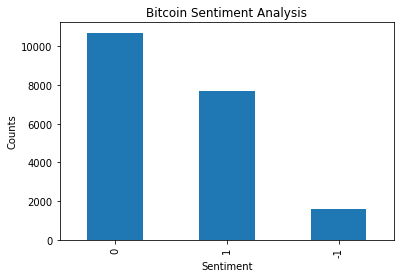

In [14]:
final_tweets["Label"].value_counts()
plt.title("Bitcoin Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
final_tweets["Label"].value_counts().plot(kind = "bar")
plt.show()

# Model Analysis

In [15]:
##Feature Extraction
vectorizer = TfidfVectorizer(use_idf = True, norm = "l2", smooth_idf = True)

y = final_tweets.Label.values

X = vectorizer.fit_transform(final_tweets["clean_text"].values.astype("U"))

In [16]:
## Splitting data for train and test
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 1, test_size = 0.3, shuffle = False)

# SVM

In [17]:
svcclassifier = SVC(kernel = "linear")
svcclassifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
#y_pred_svm = svcclassifier.decision_function(X_test)

In [18]:
y_pred = svcclassifier.predict(X_test)

In [21]:
#from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
#Check Result
matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",matrix)
score=accuracy_score(y_test,y_pred)
print("Accuracy Score :",score)
report=classification_report(y_test,y_pred)
print("Classification Report: \n",report)

error = metrics.mean_absolute_error(y_test, y_pred)
print("Error: ", error)

Confusion Matrix: 
 [[ 243  149   43]
 [   3 3094   25]
 [  32  302 2109]]
Accuracy Score : 0.9076666666666666
Classification Report: 
               precision    recall  f1-score   support

          -1       0.87      0.56      0.68       435
           0       0.87      0.99      0.93      3122
           1       0.97      0.86      0.91      2443

   micro avg       0.91      0.91      0.91      6000
   macro avg       0.91      0.80      0.84      6000
weighted avg       0.91      0.91      0.90      6000

Error:  0.10483333333333333


[Text(91.68, 0.5, 'Actual'), Text(0.5, 15.0, 'Prediction')]

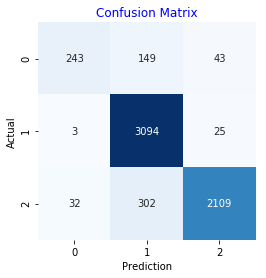

In [26]:
## Visualizing Confusion matrix
import seaborn as sns
plot = sns.heatmap(matrix, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
plot.set_title("Confusion Matrix", color = "blue")
plot.set(xlabel="Prediction", ylabel = "Actual")

# Learning Curve SVM

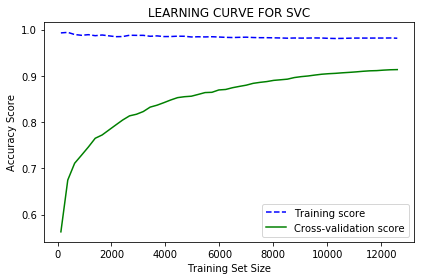

In [37]:
from sklearn.model_selection import learning_curve

# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(SVC(kernel = "linear"), X_train, y_train, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b", label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

# Drawing plot
plt.title("LEARNING CURVE FOR SVC")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Naive Bayes

In [22]:
nbmodel=MultinomialNB()
nbclassifier = nbmodel.fit(X_train, y_train)
y_pred = nbmodel.predict(X_test)

In [23]:
#Check Result
matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",matrix)
score=accuracy_score(y_test,y_pred)
print("Accuracy Score :",score)
report=classification_report(y_test,y_pred)
print("Classification Report: \n",report)


error = metrics.mean_absolute_error(y_test, y_pred)
print("Error: ", error)

Confusion Matrix: 
 [[   8  286  141]
 [   0 2951  171]
 [   0  572 1871]]
Accuracy Score : 0.805
Classification Report: 
               precision    recall  f1-score   support

          -1       1.00      0.02      0.04       435
           0       0.77      0.95      0.85      3122
           1       0.86      0.77      0.81      2443

   micro avg       0.81      0.81      0.81      6000
   macro avg       0.88      0.58      0.57      6000
weighted avg       0.82      0.81      0.78      6000

Error:  0.2185


# Learning Curve NB

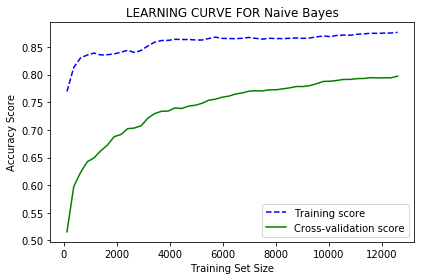

In [35]:
from sklearn.model_selection import learning_curve

# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(MultinomialNB(), X_train, y_train, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b", label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

# Drawing plot
plt.title("LEARNING CURVE FOR Naive Bayes")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# RandomForestClassifeir

In [24]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(X_train,y_train)
y_pred = randomclassifier.predict(X_test)

In [25]:
#Check Result
matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",matrix)
score=accuracy_score(y_test,y_pred)
print("Accuracy Score :",score)
report=classification_report(y_test,y_pred)
print("Classification Report: \n",report)

error = metrics.mean_absolute_error(y_test, y_pred)
print("Error: ", error)

Confusion Matrix: 
 [[ 178  192   65]
 [   1 3091   30]
 [  13  375 2055]]
Accuracy Score : 0.8873333333333333
Classification Report: 
               precision    recall  f1-score   support

          -1       0.93      0.41      0.57       435
           0       0.84      0.99      0.91      3122
           1       0.96      0.84      0.89      2443

   micro avg       0.89      0.89      0.89      6000
   macro avg       0.91      0.75      0.79      6000
weighted avg       0.90      0.89      0.88      6000

Error:  0.12566666666666668


# Learning Curve RandomForestClassifier

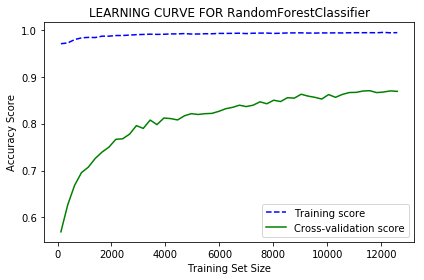

In [34]:
from sklearn.model_selection import learning_curve

# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(RandomForestClassifier(), X_train, y_train, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b", label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

# Drawing plot
plt.title("LEARNING CURVE FOR RandomForestClassifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()